## Capstone2: Data Wrangling


House Prices - Advanced Regression Techniques

Predict sales prices and practice feature engineering, RFs, and gradient boosting

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pickle # save load models
from datetime import datetime
from collections import Counter
import scipy.stats as st

# utils
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


# import sklearn ML library
# scoring
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics



In [6]:
# data 
p="/Users/yuenyeelo/Documents/Jobs/springboard/projects/Capstone2/house_price_prediction/data/"
trainfile=p+"train.csv"
testfile=p+"test.csv"

In [7]:
df=pd.read_csv(trainfile)

In [8]:
df.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [9]:
print(df.shape)
print(df.columns.tolist())

(1460, 81)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea

In [23]:
for c in df.columns:
    print(c, df[c].unique())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 

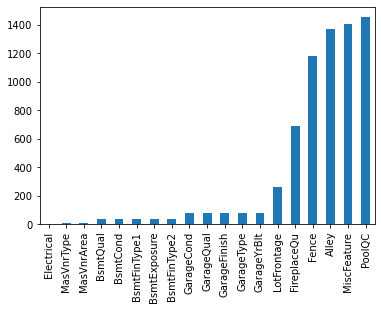

In [29]:
# check number of NAN in data

missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()


In [33]:
print(df['PoolArea'].unique())
print(df['PoolQC'].unique())
print(df['MiscFeature'].unique())
print(df['Alley'].unique())
print(df['Fence'].unique())
print(df['FireplaceQu'].unique())
#print(df['LotFrontage'].unique())

[  0 512 648 576 555 480 519 738]
[nan 'Ex' 'Fa' 'Gd']
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
[nan 'Grvl' 'Pave']
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [11]:
n=df.nunique(axis=0)
print(n)

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc71871b400>]],
      dtype=object)

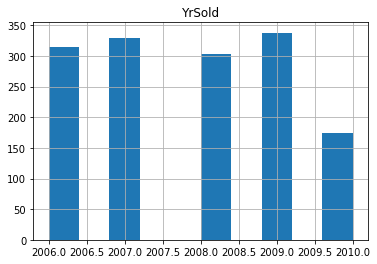

In [24]:
# check the year range
df['YrSold'].value_counts() #unique()
df.hist('YrSold')

In [25]:
# for each year, 
df_year_month_sale= df.groupby([df.YrSold, df.MoSold]).mean()
print(df_year_month_sale.SalePrice)

YrSold  MoSold
2006    1         201090.000000
        2         194322.222222
        3         184982.200000
        4         174312.814815
        5         158928.289474
        6         172283.333333
        7         183211.059701
        8         196239.956522
        9         223768.866667
        10        172356.708333
        11        213285.000000
        12        185545.000000
2007    1         183234.615385
        2         176301.750000
        3         176567.782609
        4         170772.608696
        5         169873.511628
        6         179725.813559
        7         195396.843137
        8         183941.075000
        9         195533.818182
        10        215428.812500
        11        197709.333333
        12        214414.500000
2008    1         178504.692308
        2         159370.000000
        3         178505.277778
        4         159293.346154
        5         188334.473684
        6         169730.941176
        7         174562.

In [28]:



monthSold=df.groupby([df.YrSold])['MoSold'].value_counts().sort_index()
monthSold


YrSold  MoSold
2006    1         10
        2          9
        3         25
        4         27
        5         38
        6         48
        7         67
        8         23
        9         15
        10        24
        11        16
        12        12
2007    1         13
        2          8
        3         23
        4         23
        5         43
        6         59
        7         51
        8         40
        9         11
        10        16
        11        24
        12        18
2008    1         13
        2         10
        3         18
        4         26
        5         38
        6         51
        7         49
        8         29
        9         17
        10        22
        11        17
        12        14
2009    1         12
        2         10
        3         19
        4         26
        5         37
        6         59
        7         61
        8         30
        9         20
        10        27
        11        2

In [33]:
quantitative = [f for f in df.columns if df.dtypes[f] != 'object']
quantitative.remove('SalePrice')
quantitative.remove('Id')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

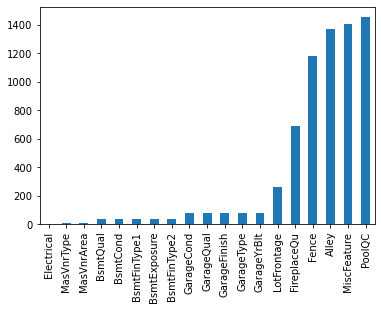

In [ ]:
# Not many house have pool